In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
data = pd.read_csv('mushrooms.csv')
data.head(n=5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [12]:
target_col = 'class'
categorical_features = data.columns.tolist()  
if target_col in categorical_features:
    categorical_features.remove(target_col)

In [13]:
X = data[categorical_features]
y = data[target_col]

In [14]:
label_encoder = LabelEncoder()
X_encoded = X.apply(label_encoder.fit_transform)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [16]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [17]:
probability_estimates = nb_classifier.predict_proba(X_train)

logistic_regression = LogisticRegression()
logistic_regression.fit(probability_estimates, y_train)

test_probability_estimates = nb_classifier.predict_proba(X_test)
y_pred_logistic = logistic_regression.predict(test_probability_estimates)

accuracy = accuracy_score(y_test, y_pred_logistic)

classification_rep = classification_report(y_test, y_pred_logistic)

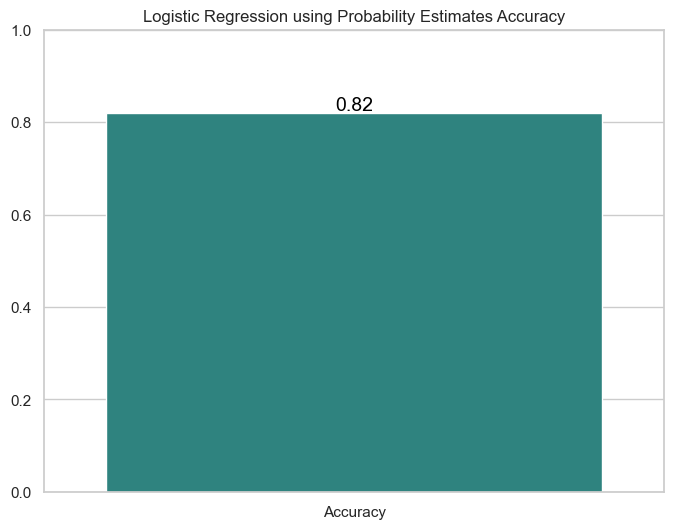

Accuracy: 0.8203076923076923
Classification Report:
               precision    recall  f1-score   support

           e       0.78      0.90      0.84       843
           p       0.87      0.73      0.80       782

    accuracy                           0.82      1625
   macro avg       0.83      0.82      0.82      1625
weighted avg       0.83      0.82      0.82      1625



In [18]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=["Accuracy"], y=[accuracy], palette="viridis")
ax.set(title="Logistic Regression using Probability Estimates Accuracy")
plt.ylim(0, 1.0)

for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=14, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)


#### Foot note 
- `MultinomialNB` is a classification algorithm, specifically the Multinomial Naive Bayes classifier. It is a variant of the Naive Bayes classifier that is well-suited for classification tasks where the features represent counts or frequencies of events, typically in the form of discrete data.
